# Covid-19 Impacts Analysis (Case Study)

### Import libraries

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load datasets

In [236]:
df_raw = pd.read_csv('raw_data.csv')
df_trans = pd.read_csv('transformed_data.csv')

### Exploratory Analysis

In [237]:
df_raw.head()

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
0,AFG,Afghanistan,12/31/2019,0.0,0.0,0.0,38928341,1803.987,0.498
1,AFG,Afghanistan,1/1/2020,0.0,0.0,0.0,38928341,1803.987,0.498
2,AFG,Afghanistan,1/2/2020,0.0,0.0,0.0,38928341,1803.987,0.498
3,AFG,Afghanistan,1/3/2020,0.0,0.0,0.0,38928341,1803.987,0.498
4,AFG,Afghanistan,1/4/2020,0.0,0.0,0.0,38928341,1803.987,0.498


In [238]:
df_raw.shape

(50418, 9)

In [239]:
df_raw.describe()

,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
count,4.732400e+04,39228.000000,43292.000000,5.041800e+04,44706.000000,44216.000000
mean,6.621927e+04,2978.767819,56.162022,4.251601e+07,20818.706240,0.720139
std,4.045582e+05,13836.644013,27.532685,1.564607e+08,20441.365392,0.160902
min,0.000000e+00,0.000000,0.000000,8.090000e+02,661.240000,0.000000
25%,1.260000e+02,10.000000,37.960000,1.399491e+06,5338.454000,0.601000
50%,1.594000e+03,64.000000,61.110000,8.278737e+06,13913.839000,0.752000
75%,1.584775e+04,564.000000,78.700000,2.913681e+07,31400.840000,0.847000
max,8.154595e+06,219674.000000,100.000000,1.439324e+09,116935.600000,0.953000


In [240]:
df_trans.head()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754


In [241]:
df_trans.describe()

,HDI,TC,TD,STI,POP,GDPCAP
count,44216.000000,50418.000000,50418.000000,50418.000000,50418.000000,50418.000000
mean,0.720139,6.762125,3.413681,3.178897,15.442097,8.318580
std,0.160902,3.637347,3.082761,1.673451,2.495039,3.177130
min,0.000000,0.000000,0.000000,0.000000,6.695799,0.000000
25%,0.601000,4.158883,0.000000,2.867331,14.151619,7.955479
50%,0.752000,7.092574,3.178054,4.000583,15.929201,9.368531
75%,0.847000,9.504669,5.620401,4.335852,17.187513,10.237704
max,0.953000,15.914092,12.299900,4.605170,21.087439,11.669379


In [242]:
df_trans.shape

(50418, 9)

In [243]:
print("Null values in raw_data:\n",df_raw.isna().sum().sort_values())
print("*"*25)
print("Null values in transformed_data:\n",df_trans.isna().sum().sort_values())

Null values in raw_data:
 iso_code                       0
location                       0
date                           0
population                     0
total_cases                 3094
gdp_per_capita              5712
human_development_index     6202
stringency_index            7126
total_deaths               11190
dtype: int64
*************************
Null values in transformed_data:
 CODE          0
COUNTRY       0
DATE          0
TC            0
TD            0
STI           0
POP           0
GDPCAP        0
HDI        6202
dtype: int64


In [244]:
print("duplicated values in raw_data:\n",df_raw.duplicated().sum())
print("*"*25)
print("duplicated values in transformed_data:\n",df_trans.duplicated().sum())

duplicated values in raw_data:
 0
*************************
duplicated values in transformed_data:
 0


In [245]:
df_trans["COUNTRY"].value_counts()

Afghanistan        294
Indonesia          294
Macedonia          294
Luxembourg         294
Lithuania          294
                  ... 
Tajikistan         172
Comoros            171
Lesotho            158
Hong Kong           51
Solomon Islands      4
Name: COUNTRY, Length: 210, dtype: int64

### Create new dataframe with one observation for each country

In [246]:
code = df_trans["CODE"].unique().tolist()
country = df_trans["COUNTRY"].unique().tolist()
hdi = []
tc = []
td = []
sti = []
population = df_trans["POP"].unique().tolist()
gdp = []


for i in country:
    hdi.append((df_trans.loc[df_trans["COUNTRY"] == i, "HDI"]).sum())
    tc.append((df_raw.loc[df_raw["location"] == i, "total_cases"]).sum())
    td.append((df_raw.loc[df_raw["location"] == i, "total_deaths"]).sum())
    sti.append((df_trans.loc[df_trans["COUNTRY"] == i, "STI"]).sum())
    population.append((df_raw.loc[df_raw["location"] == i, "population"]).sum())
    gdp.append((df_raw.loc[df_trans["COUNTRY"] == i, "gdp_per_capita"]).sum())

df = pd.DataFrame(list(zip(code, country, hdi, tc, td, sti, population, gdp)), 
                               columns = ["country_code", "country", "HDI", 
                                          "total_cases", "total_deaths", 
                                          "stringency_index", "population", "GDP"])

In [247]:
df.head()

,country_code,country,HDI,total_cases,total_deaths,stringency_index,population,GDP
0,AFG,Afghanistan,146.412,5126433.0,165875.0,896.603996,17.477233,530372.178
1,ALB,Albania,176.625,1071951.0,31056.0,883.653354,14.872537,2655771.975
2,DZA,Algeria,221.676,4893999.0,206429.0,939.379534,17.596309,4090668.666
3,AND,Andorra,193.908,223576.0,9850.0,787.230267,11.254996,0.000
4,AGO,Angola,123.172,304005.0,11820.0,871.874556,17.307957,1233732.940


In [248]:
df.shape

(210, 8)

In [249]:
df.to_csv('Covid-19_dataset')  #This dataframe is generated for Tableau Analysis 

### Create new dataframe for the highest total cases countries

In [250]:
data = df.sort_values(by=["total_cases"], ascending=False).head(10)

In [251]:
def BarPlot(column):
    plt.figure(figsize=(15,8))
    sns.set_style("whitegrid")
    sns.barplot(x='country', y=column, data=data.sort_values(by=[column], 
                                                        ascending=False), palette ='coolwarm')
    plt.title(f'Countries with the highest {column}', fontsize=15)
    plt.xlabel('Country', fontsize=13)
    plt.xticks(fontsize=12, rotation=45)
    plt.ylabel(column, fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

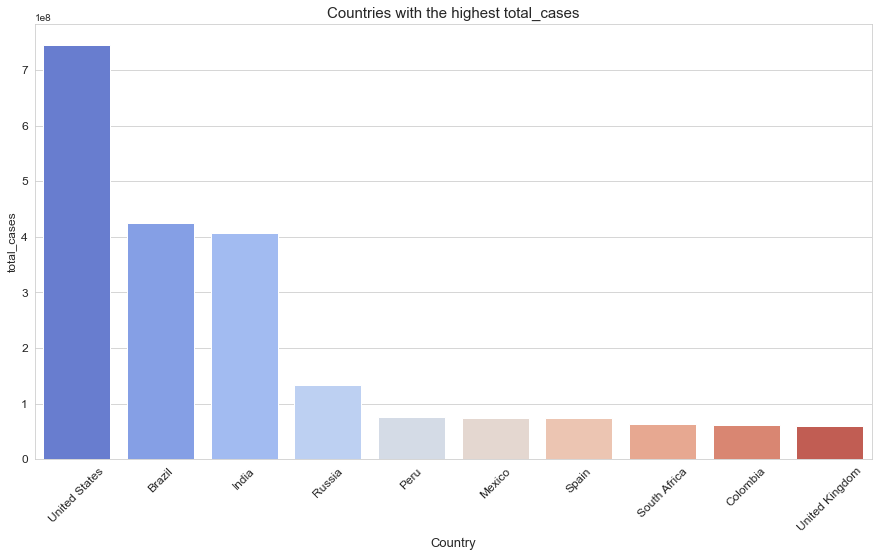

In [252]:
BarPlot('total_cases')

United states has the highest number of cases followed by Brazil and UK is the least country that has cases, let's look on thetotal deaths plot.

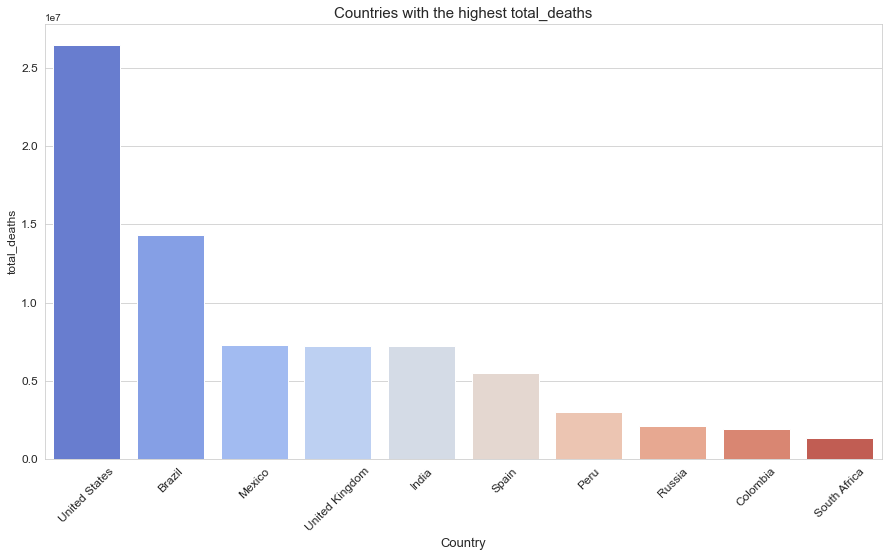

In [253]:
BarPlot("total_deaths")

As expected Us and Brazil have the highest total deaths, UK comes in the fouth place despite the low number of cases.

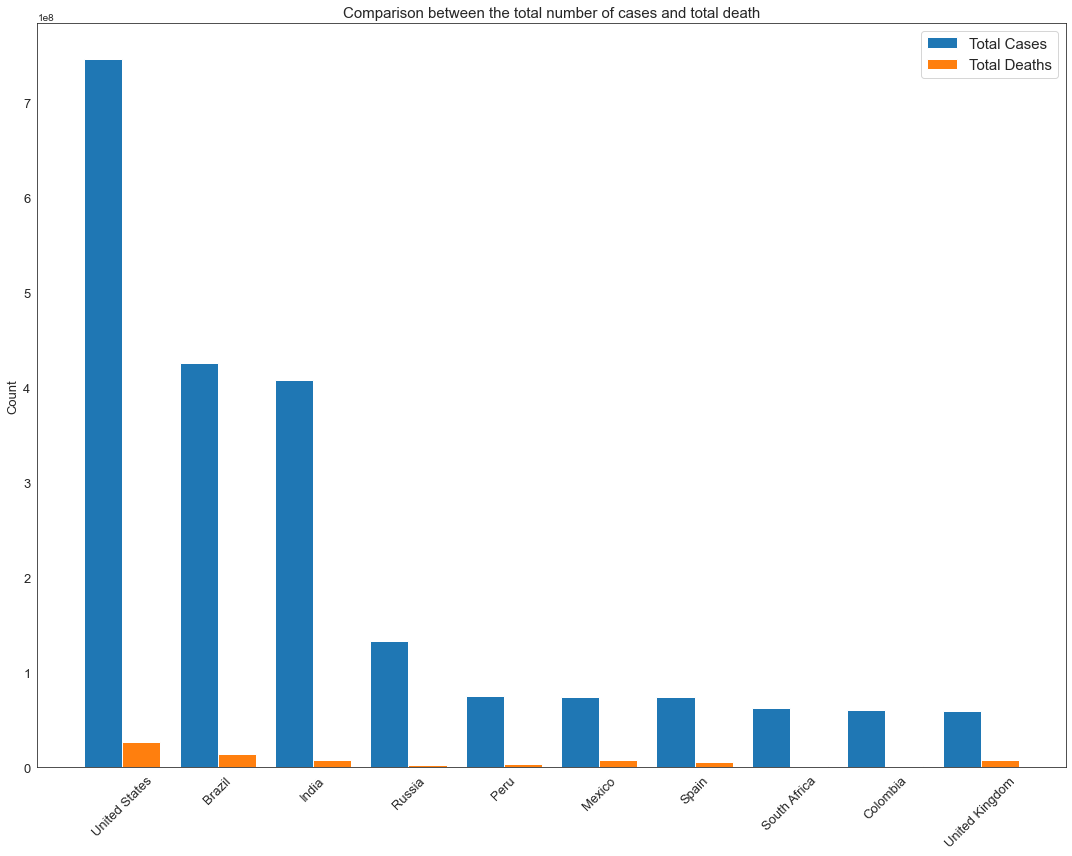

In [254]:
sns.set_style("white")
width = 0.4  # the width of the bars
x = np.arange(len(data['country']))
fig, ax = plt.subplots(figsize=(15,12))
rects1 = ax.bar(x - width/2, data['total_cases'], width, label='Total Cases')
rects2 = ax.bar(x + width/2, data['total_deaths'], width, label='Total Deaths')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count', fontsize=13)
ax.set_title('Country')
ax.set_xticks(x, data['country'], fontsize=13, rotation=45)
plt.yticks(fontsize=13)
ax.legend(fontsize=15)

plt.title('Comparison between the total number of cases and total death', fontsize=15)
fig.tight_layout()

plt.show()

Grouped bae chart shows total cases and deaths side by side.

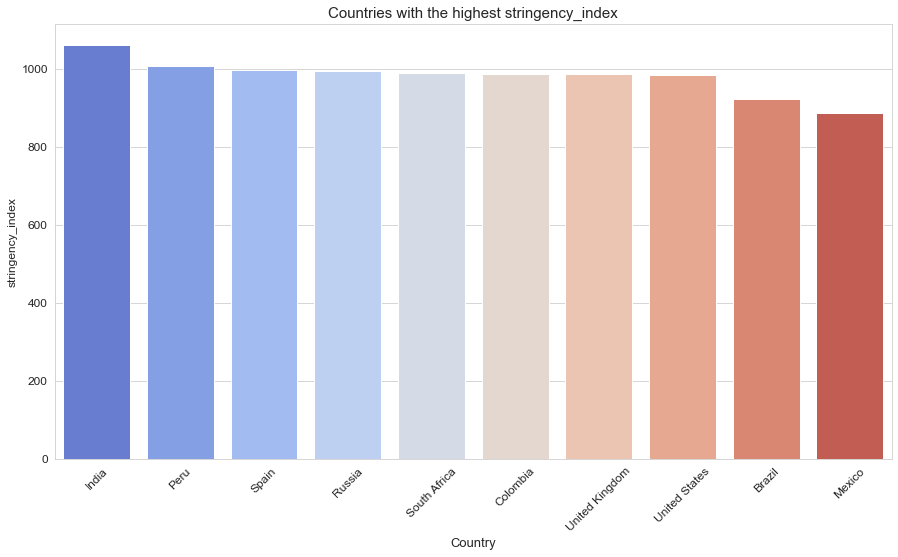

In [255]:
BarPlot('stringency_index')

India is the highest country of stringency index followed by Peru and Spain. Countries of the highest number of cases such as the US and brazil have less stringency index.

In [256]:
data['death_rate'] = (data['total_deaths']/data['total_cases'])*100

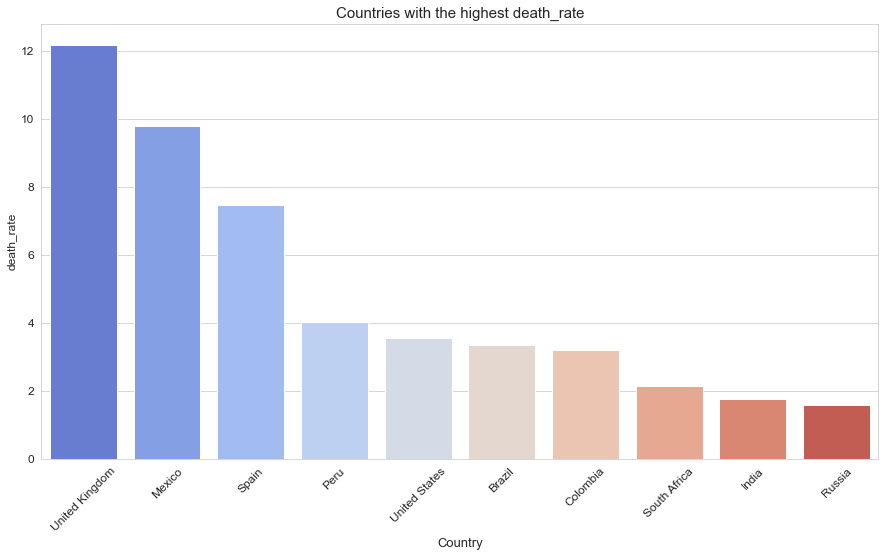

In [257]:
BarPlot('death_rate')

The death rate ratio shows that the UK has the highest death rate, and the US with highrst cases comes in the fifth place.

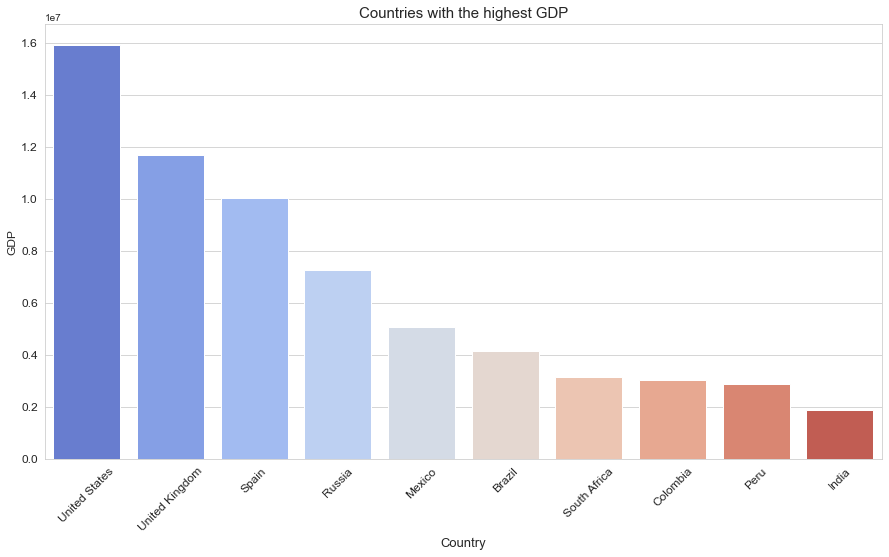

In [258]:
BarPlot('GDP')

Although the US and the UK have the highest GDP, people are suffering more during the pandemic.

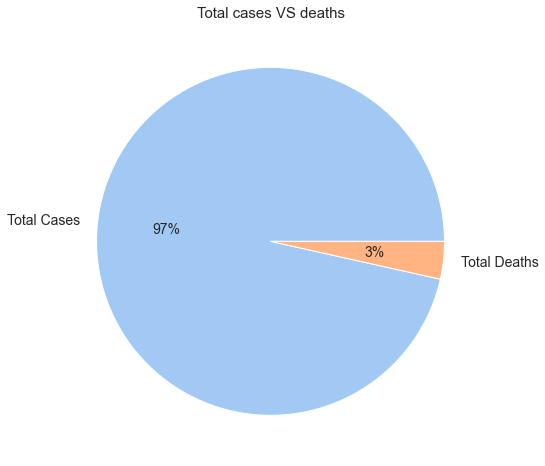

In [259]:
cases = data['total_cases'].sum()
deaths = data['total_deaths'].sum()

labels = ["Total Cases", "Total Deaths"]
values = [cases, deaths]
colors = sns.color_palette('pastel')
plt.figure(figsize = (10,8))
plt.pie(values, labels = labels, colors = colors, autopct='%.0f%%', textprops={'fontsize': 14})
plt.title('Total cases VS deaths', fontsize=15)
plt.show()

Pie chart shows that among the top ten selected countries only 3% of the infected cases died.

### Conclusion


This dataset show the impact of the Covid-19 on different countires. The highest cases and deaths were in the United States, while the UK has the lowest number of cases and South Africa has the lowest number of deaths.
Countries with high number of cases has low stringency index and high death rate ratio.